<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 8 - SVM
###Ojasa Chitre


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

Code for plotting Support Vector

In [2]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
  # finding range of x
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  # print(x_min,x_max)
  # finding range of y
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
  # creating meshgrid for x and y
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  # reshaping z to match xx
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
  # Support vectors indicated in plot by vertical lines
  sv = svc.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max) 
  plt.xlabel('X1')
  plt.ylabel('X2') 
  plt.show()
  print('Number of support vectors: ', svc.support_.size)

In [3]:
from sklearn.svm import SVC

In [4]:
# Generating random data: 20 observations of 2 features and divide into two classes
np.random.seed(5)
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

Text(0, 0.5, 'X2')

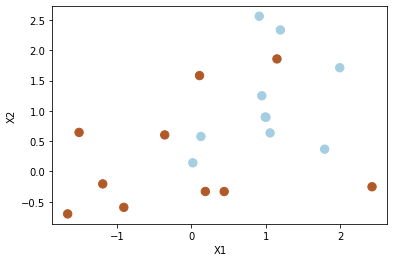

In [5]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

In [6]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

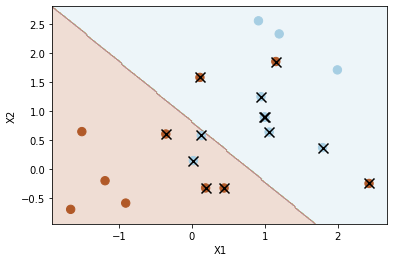

Number of support vectors:  13


In [7]:
plot_svc(svc, X, y)

In [8]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

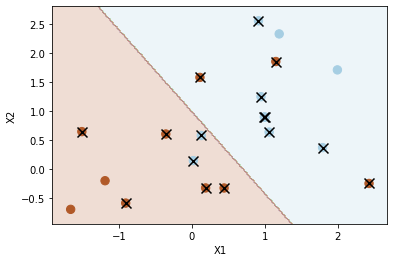

Number of support vectors:  16


In [9]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

In [10]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation

tuned_parameters = [{'C': [0.0001,0.001, 0.01, 0.1, 1, 5, 10, 100]}]

clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring= 'accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [11]:
clf.score(X,y)

0.8

In [12]:
clf.best_params_

{'C': 0.0001}

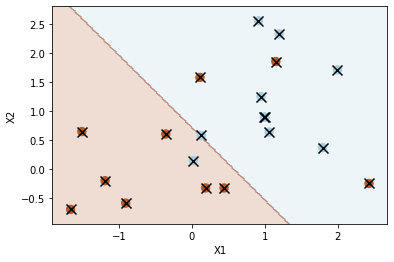

Number of support vectors:  20


In [13]:
svc2 = SVC(C=0.0001, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

In [14]:
np.random.seed(1)

X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)

X_test[y_test == 1] = X_test[y_test == 1] -1

In [15]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


Text(0, 0.5, 'X2')

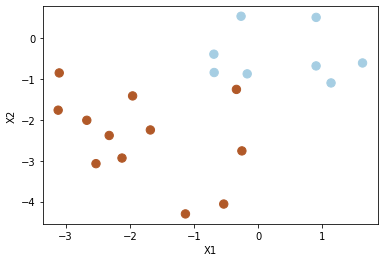

In [16]:
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

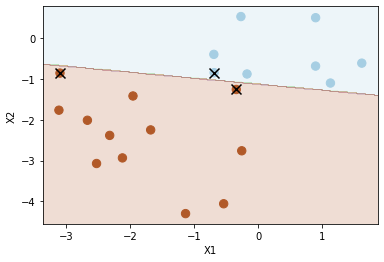

Number of support vectors:  3


In [17]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

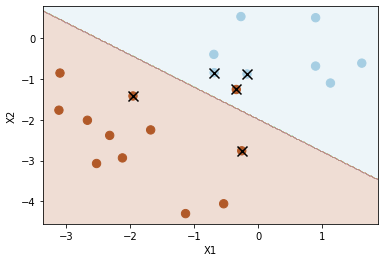

Number of support vectors:  5


In [18]:
svc4 = SVC(C=1, kernel='linear') 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

## Non-linear kernel

In [19]:
from sklearn.model_selection import train_test_split 
np.random.seed(8)

X = np.random.randn(200,2)

X[:100] = X[:100] +2

X[101:150] = X[101:150] -2

y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

Text(0, 0.5, 'X2')

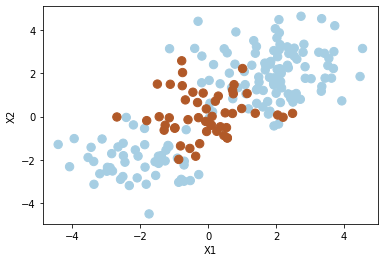

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state = 42)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

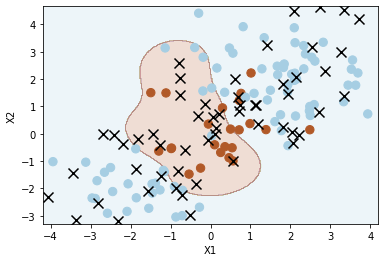

Number of support vectors:  59


In [21]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train)

plot_svc(svm, X_test, y_test)

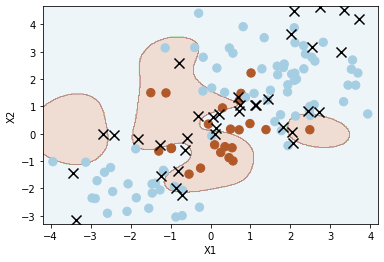

Number of support vectors:  40


In [22]:
# Increasing C parameter, allowing more flexibility 
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train)

plot_svc(svm2, X_test, y_test)

In [23]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4],
                     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

clf.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other. 

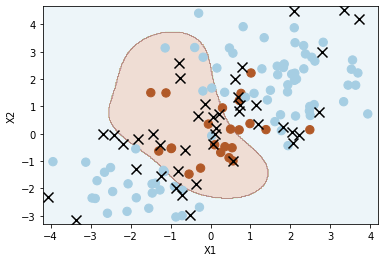

Number of support vectors:  46
[[71  6]
 [ 8 15]]
0.86


In [24]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

In [27]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import roc_curve, auc

In [30]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

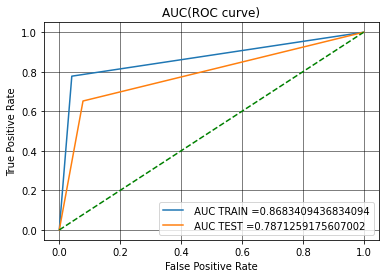

In [31]:
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

##Conclusion:
I was able to understand how SVM works. I was able to understand how the hyper parameters can be tweaked to make the performance better.